## 작성자 : 윤문섭
### Train data : Offset Data
### Test data : offset data


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
tf.random.set_seed(777)
import matplotlib.pyplot as plt
import math
import os
import datetime
import time
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import clone_model
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model


################################## 시간 측정용 ###########################################
start = time.time()
################################## Data 불러오기 ###################################
# Data Load
Train_data=pd.read_csv('Total_train.csv',header=None)          # Class 0,1 둘다 포함
Class_0_test=pd.read_csv('Class0_Total_test.csv',header=None)  # Class 0 
Class_1_test=pd.read_csv('Class1_Total_test.csv',header=None)  # Class 1 
Class_0_val=pd.read_csv('Class0_validation.csv',header=None)   # only 0 validation 
Test_Class1 = pd.read_csv('Class_1_test_set.csv',header=None)
Test_Class2 = pd.read_csv('Class_2_test_set.csv',header=None)
# Test_Class2_all = pd.read_csv('Collision_2_test_All_C.csv',header=None)
# Test_Class3 = pd.read_csv('Class_3_test_set.csv',header=None)

In [2]:
def min_max_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

def StandardScaler(data): #평균을 제거하고 데이터를 단위 분산으로 조정.(기본스케일, 평균과 표준편차 사용)
    return (data-np.mean(data))/np.std(data)

In [3]:
learning_rate = 0.001
SNR_num=np.arange(0,30,1)
Class_num = 12
test_num=3000

## Data process

In [4]:
# shape check
print("ToTal Train Data Shape  : " , Train_data.shape)
print("Class '0' test Data Shape  : " , Class_0_test.shape)
print("ToTal '1' test Data Shape  : " , Class_1_test.shape)
print("Class_0_val Shape :", Class_0_val.shape)

ToTal Train Data Shape  :  (442400, 96)
Class '0' test Data Shape  :  (30000, 96)
ToTal '1' test Data Shape  :  (495000, 96)
Class_0_val Shape : (10000, 96)


In [5]:
# Make array
# Train
Total_Train=np.array(Train_data, dtype=np.float32)
np.random.shuffle(Total_Train)

x_train = Total_Train[:,:-1]
y_train = Total_Train[:,[-1]]
y_train = tf.keras.utils.to_categorical(y_train, num_classes=Class_num)
print("------------------------------------------------------")
print("x Train shape : ", x_train.shape)
print("y Train shape : ", y_train.shape)
print("------------- After reshape xTrain shape -------------")

x_train_re= x_train.reshape(x_train.shape[0],x_train.shape[1],1)
print("reshape x Train shape : ", x_train_re.shape)

------------------------------------------------------
x Train shape :  (442400, 95)
y Train shape :  (442400, 12)
------------- After reshape xTrain shape -------------
reshape x Train shape :  (442400, 95, 1)


In [6]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [7]:
# validation
Class_0_val=np.array(Class_0_val, dtype=np.float32)
np.random.shuffle(Class_0_val)

x_val = Class_0_val[:,:-1]
y_val = Class_0_val[:,[-1]]
y_val = tf.keras.utils.to_categorical(y_val, num_classes=Class_num)
print("------------------------------------------------------")
print("x val shape : ", x_val.shape)
print("y val shape : ", y_val.shape)
print("------------- After reshape val shape -------------")

x_val_re= x_val.reshape(x_val.shape[0],x_val.shape[1],1)
print("reshape x val shape : ", x_val_re.shape)

------------------------------------------------------
x val shape :  (10000, 95)
y val shape :  (10000, 12)
------------- After reshape val shape -------------
reshape x val shape :  (10000, 95, 1)


In [8]:
# Test
Class0_test=np.array(Class_0_test, dtype=np.float32)
Class1_test=np.array(Class_1_test, dtype=np.float32)

class0_x_test = Class0_test[:,:-1]
class0_y_test = Class0_test[:,[-1]]
class0_y_test = tf.keras.utils.to_categorical(class0_y_test, num_classes=Class_num)
class0_x_test_re= class0_x_test.reshape(class0_x_test.shape[0],class0_x_test.shape[1],1)

class1_x_test = Class1_test[:,:-1]
class1_y_test = Class1_test[:,[-1]]
class1_y_test = tf.keras.utils.to_categorical(class1_y_test, num_classes=Class_num)
print("Class 0 test shape: ",Class0_test.shape)
print("Class 1 test shape :",Class1_test.shape)
print("################### After divide #####################")
print("Class 0 test shape: ",class1_x_test.shape)
print("Class 1 test shape :",class1_y_test.shape)

Class 0 test shape:  (30000, 96)
Class 1 test shape : (495000, 96)
################### After divide #####################
Class 0 test shape:  (495000, 95)
Class 1 test shape : (495000, 12)


In [9]:
## Test total
Total_test = np.vstack((Class0_test,Class1_test))
print("ToTal Test shape : ", Total_test.shape)

Total_test_x = Total_test[:,:-1]
Total_test_y = Total_test[:,[-1]]

print("x test shape : ", Total_test_x.shape)
print("y test shape : ", Total_test_y.shape)
print("------------- After reshape x test shape -------------")

Total_test_x_re= Total_test_x.reshape(Total_test_x.shape[0],Total_test_x.shape[1],1)
print("reshape x test shape : ", Total_test_x_re.shape)

ToTal Test shape :  (525000, 96)
x test shape :  (525000, 95)
y test shape :  (525000, 1)
------------- After reshape x test shape -------------
reshape x test shape :  (525000, 95, 1)


In [10]:
# Class 1
Test_Class1=np.array(Test_Class1, dtype=np.float32)
Test_class1_x_test = Test_Class1[:,:-1]
Test_class1_y_test = Test_Class1[:,[-1]]
Test_class1_y_test = tf.keras.utils.to_categorical(Test_class1_y_test, num_classes=Class_num)

# Class 2
Test_Class2=np.array(Test_Class2, dtype=np.float32)
Test_class2_x_test = Test_Class2[:,:-1]
Test_class2_y_test = Test_Class2[:,[-1]]
Test_class2_y_test = tf.keras.utils.to_categorical(Test_class2_y_test, num_classes=Class_num)

In [11]:
############################# Class 1 & 2 #########################################
for i in range(0,30,1):
    globals()[f"Test_class1_x_test{SNR_num[i]}"] = Test_class1_x_test[(test_num*i):(test_num*(i+1)), :]
    globals()[f"Test_class1_x_test_TA{SNR_num[i]}"] = Test_class1_x_test[(test_num*i):(test_num*(i+1)), :]
    globals()[f"Test_class1_y_test{SNR_num[i]}"] = Test_class1_y_test[(test_num*i):(test_num*(i+1))]
    #globals()[f"Test_class1_{SNR_num[i]}_re"] = globals()[f"Test_class1_x_test{SNR_num[i]}"].reshape(globals()[f"Test_class1_x_test{SNR_num[i]}"].shape[0],globals()[f"Class1_Testx_{SNR_num[i]}"].shape[1],1)
    
for i in range(0,30,1):
    globals()[f"Test_class2_x_test{SNR_num[i]}"] = Test_class2_x_test[(13500*i):(13500*(i+1)), :]
    globals()[f"Test_class2_y_test{SNR_num[i]}"] = Test_class2_y_test[(13500*i):(13500*(i+1))]
    #globals()[f"Test_class2_{SNR_num[i]}_re"] = globals()[f"Test_class2_x_test{SNR_num[i]}"].reshape(globals()[f"Test_class2_x_test{SNR_num[i]}"].shape[0],globals()[f"Class1_Testx_{SNR_num[i]}"].shape[1],1)    
    

In [12]:
checkpoint_path="checkpoint_m8/cp-{epoch:d}.ckpt"
checkpoint_dir=os.path.dirname(checkpoint_path)
cp_callback=tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1,period=1)

In [13]:
input_layer = Input(shape=(x_train.shape[1],), name=f'input_{i}')
hidden_layer1 = Dense(units=95, activation='relu')(input_layer)
hidden_layer2 = Dense(units=190, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(units=285, activation='relu')(hidden_layer2)
hidden_layer4 = Dense(units=380, activation='relu')(hidden_layer3)
hidden_layer5 = Dense(units=285, activation='relu')(hidden_layer4)
hidden_layer6 = Dense(units=190, activation='relu')(hidden_layer5)
hidden_layer7 = Dense(units=95, activation='relu')(hidden_layer6)
output_layer = Dense(units=Class_num, activation='softmax')(hidden_layer7)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss='categorical_crossentropy',metrics=['accuracy']) 
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 95)]              0         
_________________________________________________________________
dense (Dense)                (None, 95)                9120      
_________________________________________________________________
dense_1 (Dense)              (None, 190)               18240     
_________________________________________________________________
dense_2 (Dense)              (None, 285)               54435     
_________________________________________________________________
dense_3 (Dense)              (None, 380)               108680    
_________________________________________________________________
dense_4 (Dense)              (None, 285)               108585    
_________________________________________________________________
dense_5 (Dense)              (None, 190)               54340 

In [32]:
history = model.fit(x_train, y_train, epochs=50, batch_size=10000, validation_data =(x_val, y_val), callbacks=[cp_callback])

Epoch 1/50
45/45 [==============================] - 0s 10ms/step - loss: 0.1376 - accuracy: 0.9458 - val_loss: 0.0101 - val_accuracy: 0.9980

Epoch 00001: saving model to checkpoint_m8\cp-1.ckpt
Epoch 2/50
45/45 [==============================] - 0s 9ms/step - loss: 0.1365 - accuracy: 0.9458 - val_loss: 0.0100 - val_accuracy: 0.9985

Epoch 00002: saving model to checkpoint_m8\cp-2.ckpt
Epoch 3/50
45/45 [==============================] - 0s 9ms/step - loss: 0.1365 - accuracy: 0.9458 - val_loss: 0.0049 - val_accuracy: 0.9991

Epoch 00003: saving model to checkpoint_m8\cp-3.ckpt
Epoch 4/50
45/45 [==============================] - 0s 9ms/step - loss: 0.1364 - accuracy: 0.9457 - val_loss: 0.0067 - val_accuracy: 0.9986

Epoch 00004: saving model to checkpoint_m8\cp-4.ckpt
Epoch 5/50
45/45 [==============================] - 0s 9ms/step - loss: 0.1374 - accuracy: 0.9455 - val_loss: 0.0115 - val_accuracy: 0.9983

Epoch 00005: saving model to checkpoint_m8\cp-5.ckpt
Epoch 6/50
45/45 [===========

45/45 [==============================] - 0s 9ms/step - loss: 0.1286 - accuracy: 0.9484 - val_loss: 0.0117 - val_accuracy: 0.9978

Epoch 00043: saving model to checkpoint_m8\cp-43.ckpt
Epoch 44/50
45/45 [==============================] - 0s 9ms/step - loss: 0.1295 - accuracy: 0.9484 - val_loss: 0.0191 - val_accuracy: 0.9965

Epoch 00044: saving model to checkpoint_m8\cp-44.ckpt
Epoch 45/50
45/45 [==============================] - 0s 9ms/step - loss: 0.1279 - accuracy: 0.9487 - val_loss: 0.0082 - val_accuracy: 0.9984

Epoch 00045: saving model to checkpoint_m8\cp-45.ckpt
Epoch 46/50
45/45 [==============================] - 0s 9ms/step - loss: 0.1276 - accuracy: 0.9490 - val_loss: 0.0178 - val_accuracy: 0.9967

Epoch 00046: saving model to checkpoint_m8\cp-46.ckpt
Epoch 47/50
45/45 [==============================] - 0s 9ms/step - loss: 0.1288 - accuracy: 0.9483 - val_loss: 0.0075 - val_accuracy: 0.9984

Epoch 00047: saving model to checkpoint_m8\cp-47.ckpt
Epoch 48/50
45/45 [=============

In [15]:
sdf

NameError: name 'sdf' is not defined

In [33]:
model.load_weights(f"checkpoint_m8/cp-{9}.ckpt") #best 35

In [34]:
A=model.evaluate(class0_x_test, class0_y_test)
print(1-A[1])

938/938 [==============================] - 2s 3ms/step - loss: 0.0063 - accuracy: 0.9990
0.0010333061218261719


## Test

In [35]:
Test_acc_Class1=np.zeros((30,1))

for i in range(30):
    print('*'*100)
    print(i)
    globals()[f"Test_Class1_{SNR_num[i]}"] = model.evaluate(globals()[f"Test_class1_x_test{SNR_num[i]}"], globals()[f"Test_class1_y_test{SNR_num[i]}"])
    Test_acc_Class1[i] = globals()[f"Test_Class1_{SNR_num[i]}"][1]

****************************************************************************************************
0
94/94 [==============================] - 0s 3ms/step - loss: 9.1631 - accuracy: 0.0057
****************************************************************************************************
1
94/94 [==============================] - 0s 3ms/step - loss: 8.8786 - accuracy: 0.0093
****************************************************************************************************
2
94/94 [==============================] - 0s 3ms/step - loss: 8.4311 - accuracy: 0.0143
****************************************************************************************************
3
94/94 [==============================] - 0s 3ms/step - loss: 8.0313 - accuracy: 0.0250
****************************************************************************************************
4
94/94 [==============================] - 0s 3ms/step - loss: 7.2950 - accuracy: 0.0537
**************************************************

In [36]:
Test_acc_Class2=np.zeros((30,1))

for i in range(30):
    print('*'*100)
    print(i)
    globals()[f"Test_Class2_{SNR_num[i]}"] = model.evaluate(globals()[f"Test_class2_x_test{SNR_num[i]}"], globals()[f"Test_class2_y_test{SNR_num[i]}"])
    Test_acc_Class2[i] = globals()[f"Test_Class2_{SNR_num[i]}"][1]

****************************************************************************************************
0
422/422 [==============================] - 1s 3ms/step - loss: 9.3961 - accuracy: 0.0027
****************************************************************************************************
1
422/422 [==============================] - 1s 3ms/step - loss: 8.9746 - accuracy: 0.0028
****************************************************************************************************
2
422/422 [==============================] - 1s 3ms/step - loss: 8.3996 - accuracy: 0.0070
****************************************************************************************************
3
422/422 [==============================] - 1s 3ms/step - loss: 7.7933 - accuracy: 0.0141
****************************************************************************************************
4
422/422 [==============================] - 1s 3ms/step - loss: 7.0190 - accuracy: 0.0279
****************************************

## Graph

<Figure size 432x288 with 0 Axes>

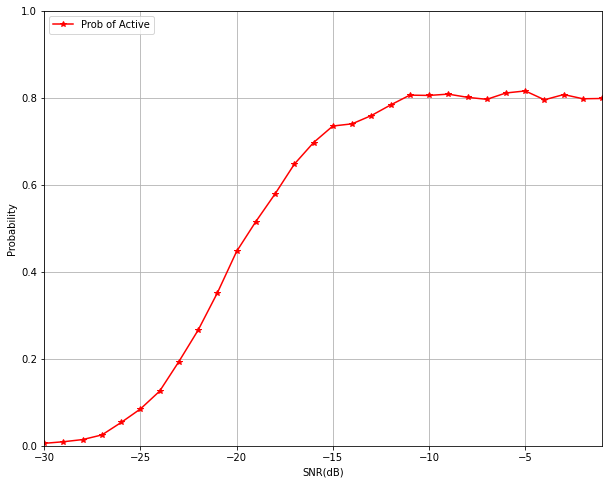

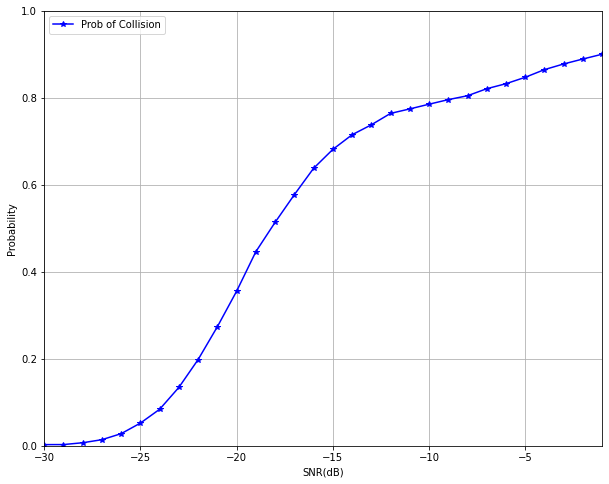

In [38]:
x=np.linspace(-30,-1,30)

plt.figure(2)
plt.figure(figsize=(10, 8))
# plt.plot(x, pDetection0001, 'bo-', label='Conventional Detection')
plt.plot(x, Test_acc_Class1, 'r*-', label='Prob of Active')
plt.legend(loc='upper left')
plt.xlabel('SNR(dB)')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.xlim(-30, -1)
plt.grid(True)

plt.figure(3)
plt.figure(figsize=(10, 8))
# plt.plot(x, pDetection0001, 'bo-', label='Conventional Detection')
plt.plot(x, Test_acc_Class2, 'b*-', label='Prob of Collision')
plt.legend(loc='upper left')
plt.xlabel('SNR(dB)')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.xlim(-30, -1)
plt.grid(True)

## Test All Combination

In [39]:
def recovery_func(x_data, y_data):
    
    a_a = 0
    a_c = 0 
    a_z = 0
    a_f_a =0
    
    c_a = 0
    c_c = 0
    c_z = 0
    
    z_z=0
    z_c=0
    z_a=0
    
    Pred =  model.predict(x_data) 
    Pred_recovery = np.argmax(Pred, axis=1).reshape(-1,1)
    Real = np.argmax(y_data, axis=1).reshape(-1,1)
    
    Collision_idx = []
    for i in range(x_data.shape[0]):
        
        if Real[i] == 0:
            if Real[i] == Pred_recovery[i]:
                z_z +=1
            elif 0 < Pred_recovery[i] and Pred_recovery[i] < 11:
                z_a +=1
            elif Pred_recovery[i] == 11:
                z_c +=1
                
        elif 0 < Real[i] and Real[i] < 11:
            if Real[i] == Pred_recovery[i]:
                a_a +=1
            elif Real[i] != Pred_recovery[i] and 0<Pred_recovery[i]<11:
                a_f_a +=1
            elif Pred_recovery[i] == 0:
                a_z +=1
            elif Pred_recovery[i] == 11:     
                a_c+=1
                Collision_idx.append(i+1)
        elif Real[i] == 11:
            if Real[i] == Pred_recovery[i]:
                c_c +=1
                
            elif 0 < Pred_recovery[i] and Pred_recovery[i] < 11:
                c_a +=1
            elif Pred_recovery[i] == 0:
                c_z +=1
                
    print("Active -> False Active : ",a_f_a ," Active -> Active: ",a_a ," Active -> Collision : ",a_c ," Active -> Non : ",a_z )
    print("Collision -> Collision : ",c_c ," Collision -> Active: ",c_a , " Collision -> Non : ",c_z )    
    print("Non -> Non : ",z_z ," Non -> Active: ",z_a , " Non -> Collision : ",z_c )  
    
    return a_f_a, a_a, a_c, a_z, Collision_idx

def recovery_C_func(x_data, y_data):
    
    a_a = 0
    a_c = 0 
    a_z = 0
    a_f_a =0
    
    c_a = 0
    c_c = 0
    c_z = 0
    
    z_z=0
    z_c=0
    z_a=0
    
    Pred =  model.predict(x_data) 
    Pred_recovery = np.argmax(Pred, axis=1).reshape(-1,1)
    Real = np.argmax(y_data, axis=1).reshape(-1,1)
    
    
    for i in range(x_data.shape[0]):
        
        if Real[i] == 0:
            if Real[i] == Pred_recovery[i]:
                z_z +=1
            elif 0 < Pred_recovery[i] and Pred_recovery[i] < 11:
                z_a +=1
            elif Pred_recovery[i] == 11:
                z_c +=1
                
        elif 0 < Real[i] and Real[i] < 11:
            if Real[i] == Pred_recovery[i]:
                a_a +=1
            elif Real[i] != Pred_recovery[i] and 0<Pred_recovery[i]<11:
                a_f_a +=1
            elif Pred_recovery[i] == 0:
                a_z +=1
            elif Pred_recovery[i] == 11:     
                a_c+=1
                
        elif Real[i] == 11:
            if Real[i] == Pred_recovery[i]:
                c_c +=1
            elif 0 < Pred_recovery[i] and Pred_recovery[i] < 11:
                c_a +=1
            elif Pred_recovery[i] == 0:
                c_z +=1
                
    print("Active -> False Active : ",a_f_a ," Active -> Active: ",a_a ," Active -> Collision : ",a_c ," Active -> Non : ",a_z )
    print("Collision -> Collision : ",c_c ," Collision -> Active: ",c_a , " Collision -> Non : ",c_z )    
    print("Non -> Non : ",z_z ," Non -> Active: ",z_a , " Non -> Collision : ",z_c )  
    
    return c_c, c_a, c_z


In [40]:
def Test_acc(x_A, y_A, SNR_num):
    TEST =np.zeros((30,1))
    SNR_num=np.arange(0,30,1)
    ############################# Class 1 & 2 #########################################
    for i in range(0,30,1):
        globals()[f"x_{SNR_num[i]}"] = x_A[(1000*i):(1000*(i+1)), :]
        globals()[f"y_{SNR_num[i]}"] = y_A[(1000*i):(1000*(i+1))]
    
    Collect = 0
    False_a_a = 0 
    False_a_c = 0
    Fakse_a_z = 0
    
    Total_conllision_set = []
    for i in range(30):
        print('*'*100)
        print(i)
        globals()[f"Test_{SNR_num[i]}"] = model.evaluate(globals()[f"x_{SNR_num[i]}"], globals()[f"y_{SNR_num[i]}"])
        TEST[i] = globals()[f"Test_{SNR_num[i]}"][1]
        a_f_a, a_a, a_c, a_z, Collision_idx = recovery_func(globals()[f"x_{SNR_num[i]}"],  globals()[f"y_{SNR_num[i]}"])
        Total_conllision_set.append(Collision_idx)
        Collect = Collect + a_a
        False_a_a = False_a_a + a_f_a
        False_a_c = False_a_c + a_c
        Fakse_a_z = Fakse_a_z + a_z
    
    print()
    print("True Active : %.2f, False Active(a->a) : %.2f, False Active(a->c) : %.2f, False Active(a->z) : %.2f" %(Collect/30000, False_a_a/30000, False_a_c/30000, Fakse_a_z/30000))
        
    return TEST, Total_conllision_set

def Test_C(x_A, y_A, SNR_num):
    TEST =np.zeros((30,1))
    SNR_num=np.arange(0,30,1)
    ############################# Class 1 & 2 #########################################
    for i in range(0,30,1):
        globals()[f"x_{SNR_num[i]}"] = x_A[(1350*i):(1350*(i+1)), :]
        globals()[f"y_{SNR_num[i]}"] = y_A[(1350*i):(1350*(i+1))]
    
    Collect = 0
    C_A = 0
    C_Z = 0
    
    for i in range(30):
        print('*'*100)
        print(i)
        globals()[f"Test_{SNR_num[i]}"] = model.evaluate(globals()[f"x_{SNR_num[i]}"], globals()[f"y_{SNR_num[i]}"])
        TEST[i] = globals()[f"Test_{SNR_num[i]}"][1]
        c_c, c_a, c_z = recovery_C_func(globals()[f"x_{SNR_num[i]}"],  globals()[f"y_{SNR_num[i]}"])
        Collect = Collect + c_c
        C_A = C_A + c_a
        C_Z = C_Z + c_z
    
    print()
    print("True Collsion : %.2f, False Collsion(c->a) : %.2f, False Collsion(c->z) : %.2f" %(Collect/3000, C_A/3000, C_Z/3000))
        
    return TEST

In [41]:
# validation
def Data_config(TEST_A_pa1):
    TEST_A_pa1=np.array(TEST_A_pa1, dtype=np.float32)

    x_A = TEST_A_pa1[:,:-1]
    y_A = TEST_A_pa1[:,[-1]]
    y_A = tf.keras.utils.to_categorical(y_A, num_classes=Class_num)
    print("------------------------------------------------------")
    print("xshape : ", x_A.shape)
    print("y shape : ", y_A.shape)
    
    return x_A, y_A

In [42]:
TEST_A_pa1=pd.read_csv('TEST_pa1.csv',header=None)
TEST_A_pa2=pd.read_csv('TEST_pa2.csv',header=None)
TEST_A_pa10=pd.read_csv('TEST_pa10.csv',header=None)
TEST_A_pa20=pd.read_csv('TEST_pa20.csv',header=None)
TEST_A_pa30=pd.read_csv('TEST_pa30.csv',header=None)
TEST_A_pa40=pd.read_csv('TEST_pa40.csv',header=None)
TEST_A_pa50=pd.read_csv('TEST_pa50.csv',header=None)
TEST_A_pa60=pd.read_csv('TEST_pa60.csv',header=None)

TEST_C_pa1=pd.read_csv('TEST_c_pa1.csv',header=None)
TEST_C_pa2=pd.read_csv('TEST_c_pa2.csv',header=None)
TEST_C_pa10=pd.read_csv('TEST_c_pa10.csv',header=None)
TEST_C_pa20=pd.read_csv('TEST_c_pa20.csv',header=None)
TEST_C_pa30=pd.read_csv('TEST_c_pa30.csv',header=None)
TEST_C_pa40=pd.read_csv('TEST_c_pa40.csv',header=None)
TEST_C_pa50=pd.read_csv('TEST_c_pa50.csv',header=None)
TEST_C_pa60=pd.read_csv('TEST_c_pa60.csv',header=None)

In [43]:
print("Active Data")
x_A, y_A= Data_config(TEST_A_pa1)
x_A2, y_A2= Data_config(TEST_A_pa2)
x_A10, y_A10= Data_config(TEST_A_pa10)
x_A20, y_A20= Data_config(TEST_A_pa20)
x_A30, y_A30= Data_config(TEST_A_pa30)
x_A40, y_A40= Data_config(TEST_A_pa40)
x_A50, y_A50= Data_config(TEST_A_pa50)
x_A60, y_A60= Data_config(TEST_A_pa60)

print()

print("Collision Data")
x_C, y_C= Data_config(TEST_C_pa1)
x_C2, y_C2= Data_config(TEST_C_pa2)
x_C10, y_C10= Data_config(TEST_C_pa10)
x_C20, y_C20= Data_config(TEST_C_pa20)
x_C30, y_C30= Data_config(TEST_C_pa30)
x_C40, y_C40= Data_config(TEST_C_pa40)
x_C50, y_C50= Data_config(TEST_C_pa50)
x_C60, y_C60= Data_config(TEST_C_pa60)


Active Data
------------------------------------------------------
xshape :  (30000, 95)
y shape :  (30000, 12)
------------------------------------------------------
xshape :  (30000, 95)
y shape :  (30000, 12)
------------------------------------------------------
xshape :  (30000, 95)
y shape :  (30000, 12)
------------------------------------------------------
xshape :  (30000, 95)
y shape :  (30000, 12)
------------------------------------------------------
xshape :  (30000, 95)
y shape :  (30000, 12)
------------------------------------------------------
xshape :  (30000, 95)
y shape :  (30000, 12)
------------------------------------------------------
xshape :  (30000, 95)
y shape :  (30000, 12)
------------------------------------------------------
xshape :  (30000, 95)
y shape :  (30000, 12)

Collision Data
------------------------------------------------------
xshape :  (40500, 95)
y shape :  (40500, 12)
------------------------------------------------------
xshape :  (40500,

In [44]:
TEST_A_PA1, Total_conllision_set1=Test_acc(x_A, y_A, SNR_num)

****************************************************************************************************
0
32/32 [==============================] - 0s 3ms/step - loss: 9.1230 - accuracy: 0.0060
Active -> False Active :  6  Active -> Active:  6  Active -> Collision :  0  Active -> Non :  988
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
1
32/32 [==============================] - 0s 3ms/step - loss: 8.8573 - accuracy: 0.0060
Active -> False Active :  7  Active -> Active:  6  Active -> Collision :  1  Active -> Non :  986
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
2
32/32 [==============================] - 0s 3ms/step 

32/32 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.7990
Active -> False Active :  167  Active -> Active:  799  Active -> Collision :  29  Active -> Non :  5
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
20
32/32 [==============================] - 0s 3ms/step - loss: 0.4659 - accuracy: 0.8010
Active -> False Active :  170  Active -> Active:  801  Active -> Collision :  29  Active -> Non :  0
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
21
32/32 [==============================] - 0s 3ms/step - loss: 0.5018 - accuracy: 0.7870
Active -> False Active :  168  Active -> Active:  787  Active

In [45]:
TEST_A_PA2, Total_conllision_set2=Test_acc(x_A2, y_A2, SNR_num)

****************************************************************************************************
0
32/32 [==============================] - 0s 3ms/step - loss: 9.1393 - accuracy: 0.0060
Active -> False Active :  4  Active -> Active:  6  Active -> Collision :  1  Active -> Non :  989
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
1
32/32 [==============================] - 0s 3ms/step - loss: 9.0443 - accuracy: 0.0090
Active -> False Active :  6  Active -> Active:  9  Active -> Collision :  2  Active -> Non :  983
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
2
32/32 [==============================] - 0s 3ms/step 

32/32 [==============================] - 0s 3ms/step - loss: 0.5597 - accuracy: 0.7840
Active -> False Active :  188  Active -> Active:  784  Active -> Collision :  21  Active -> Non :  7
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
20
32/32 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.8110
Active -> False Active :  166  Active -> Active:  811  Active -> Collision :  22  Active -> Non :  1
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
21
32/32 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.7920
Active -> False Active :  167  Active -> Active:  792  Active

In [46]:
TEST_A_PA10, Total_conllision_set10=Test_acc(x_A10, y_A10, SNR_num)

****************************************************************************************************
0
32/32 [==============================] - 0s 3ms/step - loss: 9.0439 - accuracy: 0.0080
Active -> False Active :  1  Active -> Active:  8  Active -> Collision :  0  Active -> Non :  991
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
1
32/32 [==============================] - 0s 3ms/step - loss: 9.0642 - accuracy: 0.0090
Active -> False Active :  7  Active -> Active:  9  Active -> Collision :  0  Active -> Non :  984
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
2
32/32 [==============================] - 0s 3ms/step 

32/32 [==============================] - 0s 3ms/step - loss: 0.8196 - accuracy: 0.6860
Active -> False Active :  164  Active -> Active:  686  Active -> Collision :  136  Active -> Non :  14
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
20
32/32 [==============================] - 0s 3ms/step - loss: 0.8043 - accuracy: 0.6900
Active -> False Active :  151  Active -> Active:  690  Active -> Collision :  154  Active -> Non :  5
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
21
32/32 [==============================] - 0s 3ms/step - loss: 0.8842 - accuracy: 0.6890
Active -> False Active :  146  Active -> Active:  689  Act

In [47]:
TEST_A_PA20, Total_conllision_set20=Test_acc(x_A20, y_A20, SNR_num)

****************************************************************************************************
0
32/32 [==============================] - 0s 3ms/step - loss: 9.3791 - accuracy: 0.0010
Active -> False Active :  7  Active -> Active:  1  Active -> Collision :  0  Active -> Non :  992
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
1
32/32 [==============================] - 0s 3ms/step - loss: 9.0128 - accuracy: 0.0040
Active -> False Active :  11  Active -> Active:  4  Active -> Collision :  0  Active -> Non :  985
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
2
32/32 [==============================] - 0s 3ms/step

32/32 [==============================] - 0s 3ms/step - loss: 0.8438 - accuracy: 0.6480
Active -> False Active :  236  Active -> Active:  648  Active -> Collision :  109  Active -> Non :  7
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
20
32/32 [==============================] - 0s 3ms/step - loss: 0.8523 - accuracy: 0.6390
Active -> False Active :  220  Active -> Active:  639  Active -> Collision :  139  Active -> Non :  2
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
21
32/32 [==============================] - 0s 3ms/step - loss: 0.9001 - accuracy: 0.6320
Active -> False Active :  220  Active -> Active:  632  Acti

In [48]:
TEST_A_PA30, Total_conllision_set30=Test_acc(x_A30, y_A30, SNR_num)

****************************************************************************************************
0
32/32 [==============================] - 0s 3ms/step - loss: 9.2344 - accuracy: 0.0040
Active -> False Active :  9  Active -> Active:  4  Active -> Collision :  0  Active -> Non :  987
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
1
32/32 [==============================] - 0s 3ms/step - loss: 8.8595 - accuracy: 0.0080
Active -> False Active :  8  Active -> Active:  8  Active -> Collision :  1  Active -> Non :  983
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
2
32/32 [==============================] - 0s 3ms/step 

32/32 [==============================] - 0s 3ms/step - loss: 1.1775 - accuracy: 0.5630
Active -> False Active :  249  Active -> Active:  563  Active -> Collision :  178  Active -> Non :  10
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
20
32/32 [==============================] - 0s 3ms/step - loss: 1.1579 - accuracy: 0.5530
Active -> False Active :  232  Active -> Active:  553  Active -> Collision :  213  Active -> Non :  2
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
21
32/32 [==============================] - 0s 3ms/step - loss: 1.2909 - accuracy: 0.5290
Active -> False Active :  224  Active -> Active:  529  Act

In [49]:
TEST_A_PA40, Total_conllision_set40=Test_acc(x_A40, y_A40, SNR_num)

****************************************************************************************************
0
32/32 [==============================] - 0s 3ms/step - loss: 9.2887 - accuracy: 0.0030
Active -> False Active :  9  Active -> Active:  3  Active -> Collision :  0  Active -> Non :  988
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
1
32/32 [==============================] - 0s 3ms/step - loss: 8.9447 - accuracy: 0.0050
Active -> False Active :  5  Active -> Active:  5  Active -> Collision :  0  Active -> Non :  990
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
2
32/32 [==============================] - 0s 3ms/step 

32/32 [==============================] - 0s 3ms/step - loss: 0.9700 - accuracy: 0.6040
Active -> False Active :  251  Active -> Active:  604  Active -> Collision :  138  Active -> Non :  7
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
20
32/32 [==============================] - 0s 3ms/step - loss: 1.0192 - accuracy: 0.6110
Active -> False Active :  233  Active -> Active:  611  Active -> Collision :  153  Active -> Non :  3
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
21
32/32 [==============================] - 0s 3ms/step - loss: 1.0261 - accuracy: 0.5880
Active -> False Active :  230  Active -> Active:  588  Acti

In [50]:
TEST_A_PA50, Total_conllision_set50=Test_acc(x_A50, y_A50, SNR_num)

****************************************************************************************************
0
32/32 [==============================] - 0s 3ms/step - loss: 9.3345 - accuracy: 0.0040
Active -> False Active :  5  Active -> Active:  4  Active -> Collision :  1  Active -> Non :  990
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
1
32/32 [==============================] - 0s 3ms/step - loss: 8.8833 - accuracy: 0.0080
Active -> False Active :  10  Active -> Active:  8  Active -> Collision :  0  Active -> Non :  982
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
2
32/32 [==============================] - 0s 3ms/step

32/32 [==============================] - 0s 3ms/step - loss: 0.7655 - accuracy: 0.6910
Active -> False Active :  196  Active -> Active:  691  Active -> Collision :  107  Active -> Non :  6
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
20
32/32 [==============================] - 0s 3ms/step - loss: 0.7651 - accuracy: 0.6990
Active -> False Active :  174  Active -> Active:  699  Active -> Collision :  122  Active -> Non :  5
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
21
32/32 [==============================] - 0s 3ms/step - loss: 0.7361 - accuracy: 0.7130
Active -> False Active :  159  Active -> Active:  713  Acti

In [51]:
TEST_A_PA60, Total_conllision_set60=Test_acc(x_A60, y_A60, SNR_num)

****************************************************************************************************
0
32/32 [==============================] - 0s 3ms/step - loss: 9.2027 - accuracy: 0.0040
Active -> False Active :  2  Active -> Active:  4  Active -> Collision :  0  Active -> Non :  994
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
1
32/32 [==============================] - 0s 3ms/step - loss: 8.9293 - accuracy: 0.0060
Active -> False Active :  8  Active -> Active:  6  Active -> Collision :  0  Active -> Non :  986
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
2
32/32 [==============================] - 0s 3ms/step 

32/32 [==============================] - 0s 3ms/step - loss: 0.5897 - accuracy: 0.7680
Active -> False Active :  157  Active -> Active:  768  Active -> Collision :  67  Active -> Non :  8
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
20
32/32 [==============================] - 0s 3ms/step - loss: 0.5415 - accuracy: 0.7910
Active -> False Active :  132  Active -> Active:  791  Active -> Collision :  73  Active -> Non :  4
Collision -> Collision :  0  Collision -> Active:  0  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
21
32/32 [==============================] - 0s 3ms/step - loss: 0.5816 - accuracy: 0.7720
Active -> False Active :  140  Active -> Active:  772  Active

<Figure size 432x288 with 0 Axes>

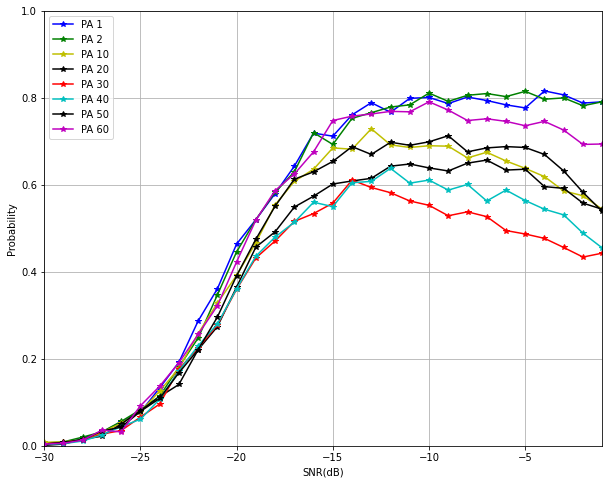

In [52]:
plt.figure(1)
plt.figure(figsize=(10, 8))
# plt.plot(x, pDetection0001, 'bo-', label='Conventional Detection')
plt.plot(x, TEST_A_PA1, 'b*-', label='PA 1')
plt.plot(x, TEST_A_PA2, 'g*-', label='PA 2')
plt.plot(x, TEST_A_PA10, 'y*-', label='PA 10')
plt.plot(x, TEST_A_PA20, 'k*-', label='PA 20')
plt.plot(x, TEST_A_PA30, 'r*-', label='PA 30')
plt.plot(x, TEST_A_PA40, 'c*-', label='PA 40')
plt.plot(x, TEST_A_PA50, 'k*-', label='PA 50')
plt.plot(x, TEST_A_PA60, 'm*-', label='PA 60')
plt.legend(loc='upper left')
plt.xlabel('SNR(dB)')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.xlim(-30, -1)
plt.grid(True)


In [53]:
TEST_C_PA1=Test_C(x_C, y_C, SNR_num)

****************************************************************************************************
0
43/43 [==============================] - 0s 3ms/step - loss: 9.4284 - accuracy: 0.0022
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  3  Collision -> Active:  37  Collision -> Non :  1310
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
1
43/43 [==============================] - 0s 3ms/step - loss: 8.9123 - accuracy: 0.0037
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  5  Collision -> Active:  60  Collision -> Non :  1285
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
2
43/43 [==============================] - 0s 3ms/s

43/43 [==============================] - 0s 3ms/step - loss: 0.7662 - accuracy: 0.7741
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  1045  Collision -> Active:  305  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
20
43/43 [==============================] - 0s 3ms/step - loss: 0.7512 - accuracy: 0.7889
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  1065  Collision -> Active:  285  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
21
43/43 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.7985
Active -> False Active :  0  Active -> Active:  0  Active -> 

In [54]:
TEST_C_PA2=Test_C(x_C2, y_C2, SNR_num)

****************************************************************************************************
0
43/43 [==============================] - 0s 3ms/step - loss: 9.3780 - accuracy: 0.0015
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  2  Collision -> Active:  38  Collision -> Non :  1310
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
1
43/43 [==============================] - 0s 3ms/step - loss: 8.9379 - accuracy: 0.0074
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  10  Collision -> Active:  57  Collision -> Non :  1283
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
2
43/43 [==============================] - 0s 3ms/

43/43 [==============================] - 0s 3ms/step - loss: 0.7285 - accuracy: 0.7778
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  1050  Collision -> Active:  300  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
20
43/43 [==============================] - 0s 3ms/step - loss: 0.7033 - accuracy: 0.7800
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  1053  Collision -> Active:  297  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
21
43/43 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.7985
Active -> False Active :  0  Active -> Active:  0  Active -> 

In [55]:
TEST_C_PA10=Test_C(x_C10, y_C10, SNR_num)

****************************************************************************************************
0
43/43 [==============================] - 0s 3ms/step - loss: 9.5343 - accuracy: 0.0030
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  4  Collision -> Active:  33  Collision -> Non :  1313
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
1
43/43 [==============================] - 0s 3ms/step - loss: 8.9657 - accuracy: 0.0059
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  8  Collision -> Active:  59  Collision -> Non :  1283
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
2
43/43 [==============================] - 0s 3ms/s

43/43 [==============================] - 0s 3ms/step - loss: 0.6157 - accuracy: 0.7941
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  1072  Collision -> Active:  278  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
20
43/43 [==============================] - 0s 3ms/step - loss: 0.5621 - accuracy: 0.8089
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  1092  Collision -> Active:  258  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
21
43/43 [==============================] - 0s 3ms/step - loss: 0.5074 - accuracy: 0.8356
Active -> False Active :  0  Active -> Active:  0  Active -> 

In [56]:
TEST_C_PA20=Test_C(x_C20, y_C20, SNR_num)

****************************************************************************************************
0
43/43 [==============================] - 0s 3ms/step - loss: 9.4844 - accuracy: 0.0030
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  4  Collision -> Active:  30  Collision -> Non :  1316
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
1
43/43 [==============================] - 0s 3ms/step - loss: 9.0915 - accuracy: 0.0030
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  4  Collision -> Active:  45  Collision -> Non :  1301
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
2
43/43 [==============================] - 0s 3ms/s

43/43 [==============================] - 0s 3ms/step - loss: 0.5597 - accuracy: 0.8037
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  1085  Collision -> Active:  265  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
20
43/43 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.8119
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  1096  Collision -> Active:  254  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
21
43/43 [==============================] - 0s 3ms/step - loss: 0.4825 - accuracy: 0.8407
Active -> False Active :  0  Active -> Active:  0  Active -> 

In [57]:
TEST_C_PA30=Test_C(x_C30, y_C30, SNR_num)

****************************************************************************************************
0
43/43 [==============================] - 0s 3ms/step - loss: 9.4916 - accuracy: 0.0015
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  2  Collision -> Active:  25  Collision -> Non :  1323
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
1
43/43 [==============================] - 0s 3ms/step - loss: 9.0292 - accuracy: 0.0037
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  5  Collision -> Active:  55  Collision -> Non :  1290
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
2
43/43 [==============================] - 0s 3ms/s

43/43 [==============================] - 0s 3ms/step - loss: 0.5345 - accuracy: 0.8193
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  1106  Collision -> Active:  244  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
20
43/43 [==============================] - 0s 3ms/step - loss: 0.5053 - accuracy: 0.8348
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  1127  Collision -> Active:  223  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
21
43/43 [==============================] - 0s 3ms/step - loss: 0.4308 - accuracy: 0.8481
Active -> False Active :  0  Active -> Active:  0  Active -> 

In [58]:
TEST_C_PA40=Test_C(x_C40, y_C40, SNR_num)

****************************************************************************************************
0
43/43 [==============================] - 0s 3ms/step - loss: 9.5506 - accuracy: 0.0015
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  2  Collision -> Active:  30  Collision -> Non :  1318
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
1
43/43 [==============================] - 0s 3ms/step - loss: 9.0180 - accuracy: 0.0030
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  4  Collision -> Active:  52  Collision -> Non :  1294
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
2
43/43 [==============================] - 0s 3ms/s

43/43 [==============================] - 0s 3ms/step - loss: 0.5143 - accuracy: 0.8267
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  1116  Collision -> Active:  234  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
20
43/43 [==============================] - 0s 3ms/step - loss: 0.5322 - accuracy: 0.8230
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  1111  Collision -> Active:  239  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
21
43/43 [==============================] - 0s 3ms/step - loss: 0.5048 - accuracy: 0.8407
Active -> False Active :  0  Active -> Active:  0  Active -> 

In [59]:
TEST_C_PA50=Test_C(x_C50, y_C50, SNR_num)

****************************************************************************************************
0
43/43 [==============================] - 0s 4ms/step - loss: 9.4532 - accuracy: 0.0015
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  2  Collision -> Active:  31  Collision -> Non :  1317
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
1
43/43 [==============================] - 0s 3ms/step - loss: 8.9683 - accuracy: 0.0030
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  4  Collision -> Active:  67  Collision -> Non :  1279
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
2
43/43 [==============================] - 0s 3ms/s

43/43 [==============================] - 0s 3ms/step - loss: 0.5647 - accuracy: 0.8104
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  1094  Collision -> Active:  256  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
20
43/43 [==============================] - 0s 3ms/step - loss: 0.5132 - accuracy: 0.8170
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  1103  Collision -> Active:  247  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
21
43/43 [==============================] - 0s 3ms/step - loss: 0.4855 - accuracy: 0.8370
Active -> False Active :  0  Active -> Active:  0  Active -> 

In [60]:
TEST_C_PA60=Test_C(x_C60, y_C60, SNR_num)

****************************************************************************************************
0
43/43 [==============================] - 0s 3ms/step - loss: 9.3642 - accuracy: 7.4074e-04
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  1  Collision -> Active:  45  Collision -> Non :  1304
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
1
43/43 [==============================] - 0s 3ms/step - loss: 9.0545 - accuracy: 0.0037
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  5  Collision -> Active:  45  Collision -> Non :  1300
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
2
43/43 [==============================] - 0s 3

43/43 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.7859
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  1061  Collision -> Active:  289  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
20
43/43 [==============================] - 0s 3ms/step - loss: 0.5918 - accuracy: 0.8059
Active -> False Active :  0  Active -> Active:  0  Active -> Collision :  0  Active -> Non :  0
Collision -> Collision :  1088  Collision -> Active:  262  Collision -> Non :  0
Non -> Non :  0  Non -> Active:  0  Non -> Collision :  0
****************************************************************************************************
21
43/43 [==============================] - 0s 3ms/step - loss: 0.6393 - accuracy: 0.7926
Active -> False Active :  0  Active -> Active:  0  Active -> 

<Figure size 432x288 with 0 Axes>

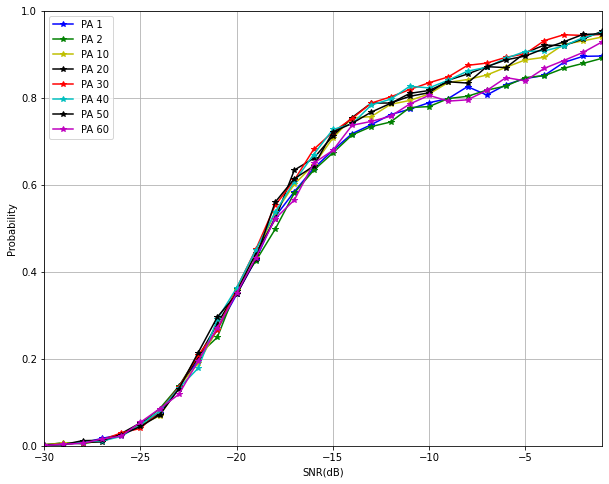

In [61]:
plt.figure(1)
plt.figure(figsize=(10, 8))
# plt.plot(x, pDetection0001, 'bo-', label='Conventional Detection')
plt.plot(x, TEST_C_PA1, 'b*-', label='PA 1')
plt.plot(x, TEST_C_PA2, 'g*-', label='PA 2')
plt.plot(x, TEST_C_PA10, 'y*-', label='PA 10')
plt.plot(x, TEST_C_PA20, 'k*-', label='PA 20')
plt.plot(x, TEST_C_PA30, 'r*-', label='PA 30')
plt.plot(x, TEST_C_PA40, 'c*-', label='PA 40')
plt.plot(x, TEST_C_PA50, 'k*-', label='PA 50')
plt.plot(x, TEST_C_PA60, 'm*-', label='PA 60')
plt.legend(loc='upper left')
plt.xlabel('SNR(dB)')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.xlim(-30, -1)
plt.grid(True)

In [ ]:
# TEST_C_PA1=Test_acc(x_C, y_C, SNR_num)
# TEST_C_PA2=Test_acc(x_C2, y_C2, SNR_num)
# TEST_C_PA3=Test_acc(x_C3, y_C3, SNR_num)
# TEST_C_PA10=Test_acc(x_C10, y_C10, SNR_num)
# TEST_C_PA20=Test_acc(x_C20, y_C20, SNR_num)
# TEST_C_PA40=Test_acc(x_C40, y_C40, SNR_num)
# TEST_C_PA60=Test_acc(x_C60, y_C60, SNR_num)